In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics


np.random.seed(42) # 乱数生成用のシードを設定
ite = 5 # 乱数生成の回数

# 2次元正規分布の平均ベクトルと共分散行列を設定
original_mean = [5, 5]  # 平均ベクトル
original_cov = [[1, 0.3], [0.3, 1]]  # 共分散行列（相関あり）

random_seed = np.random.randint(0, 10000, ite)  # ランダムな整数値をシード値として取得.例えば 0 〜 9999 の間の整数をite個生成
print("random_seed", random_seed) # 乱数シード値の確認

def bootstrap(data, num_dataset):
    """
    ブートストラップサンプリングを行う関数
    :param data: 元データ
    :param n_samples: サンプリング回数
    :return: ブートストラップサンプル
    """
    len_data = len(data)  # 元データのサイズ
    bootstrap_samples = []  # ブートストラップサンプルを格納する配列

    for i in range(num_dataset):
        indices = np.random.choice(len_data, size=len_data, replace=True)  # リサンプリングし、インデックスを取得
        bootstrap_samples.append(data[indices])   # サンプルを格納
    bootstrap_samples = np.array(bootstrap_samples)  # リストをNumPy配列に変換

    return bootstrap_samples


    


random_seed [7270  860 5390 5191 5734]


############################################
Random Seed: 7270
############################################
data.shape (500, 2)


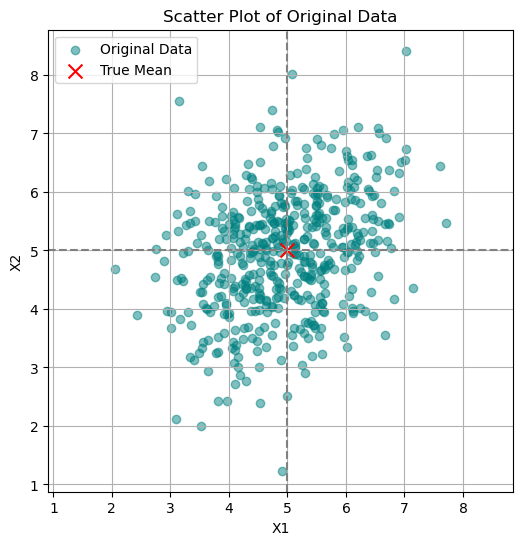

bootstrap_samples.shape (1000, 500, 2)
平均ベクトルの平均: [4.94151465 4.96137295]
共分散行列の平均:
 [[0.92371159 0.30702005]
 [0.30702005 1.02856707]]
相関係数の平均: 0.3147232358224779


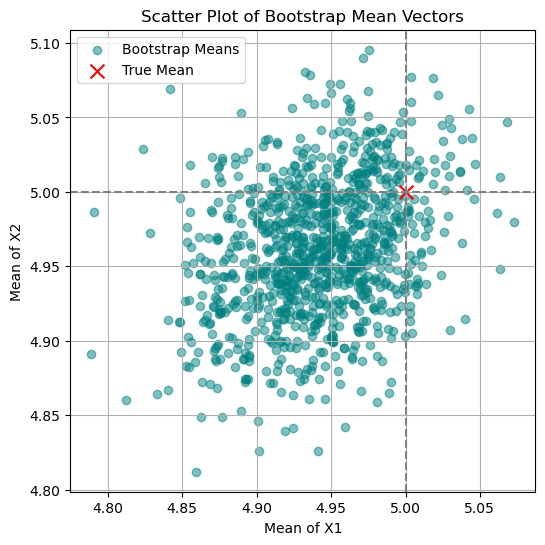

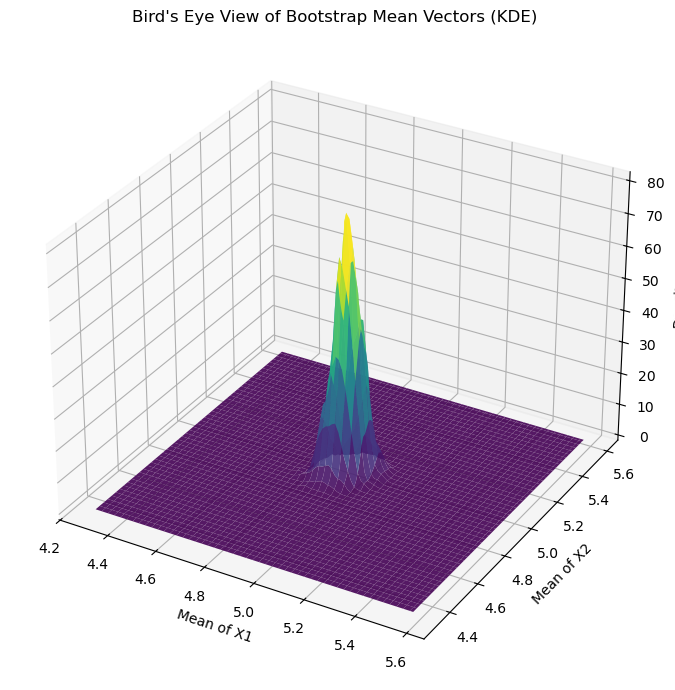

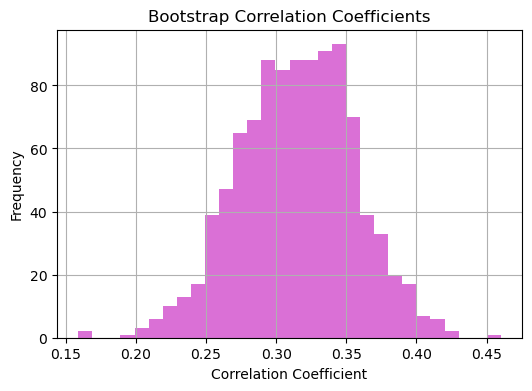

############################################
End
############################################


############################################
Random Seed: 860
############################################
data.shape (500, 2)


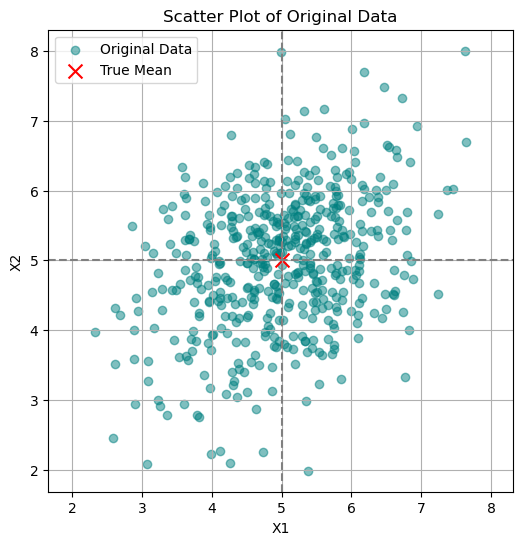

bootstrap_samples.shape (1000, 500, 2)
平均ベクトルの平均: [4.99438035 4.98416528]
共分散行列の平均:
 [[0.91800566 0.31494208]
 [0.31494208 0.94467974]]
相関係数の平均: 0.33751264567699396


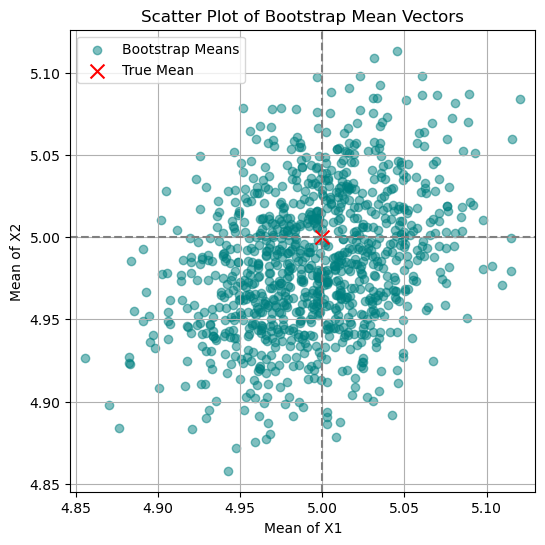

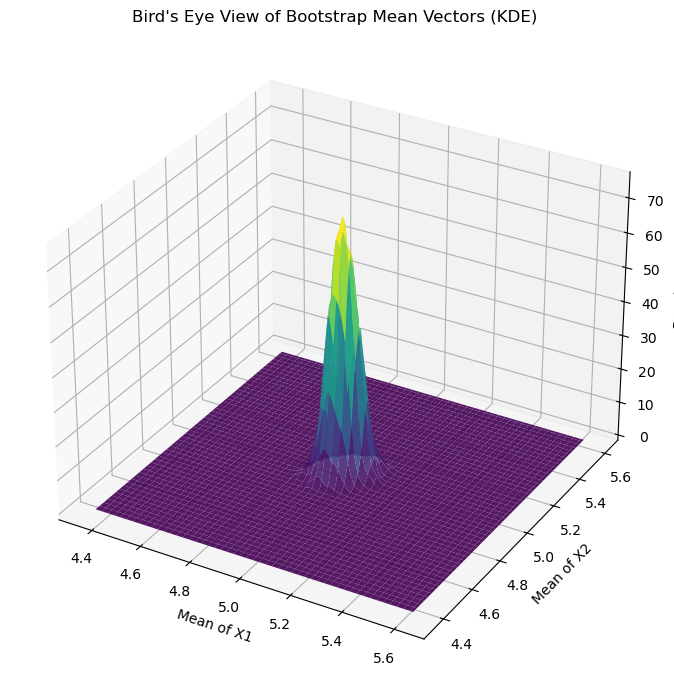

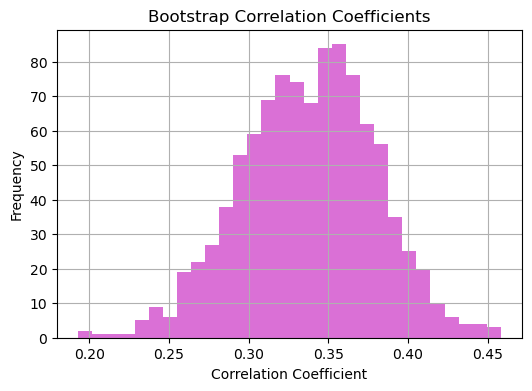

############################################
End
############################################


############################################
Random Seed: 5390
############################################
data.shape (500, 2)


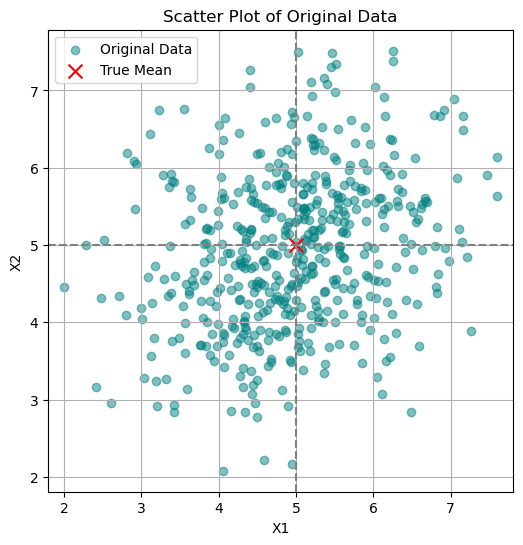

bootstrap_samples.shape (1000, 500, 2)
平均ベクトルの平均: [4.94720279 4.92610171]
共分散行列の平均:
 [[0.99549859 0.26625963]
 [0.26625963 1.02251844]]
相関係数の平均: 0.26379819934209103


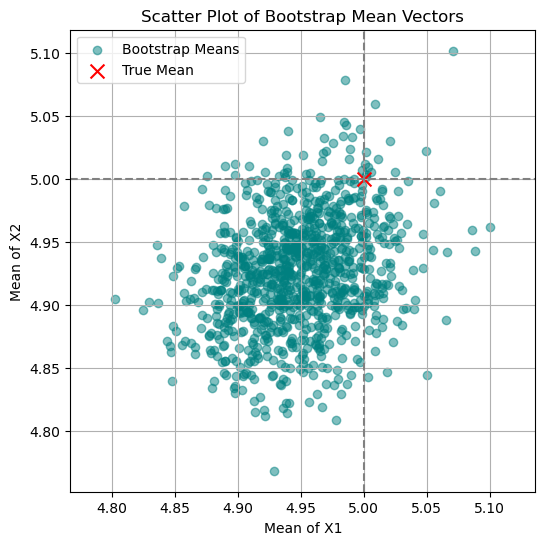

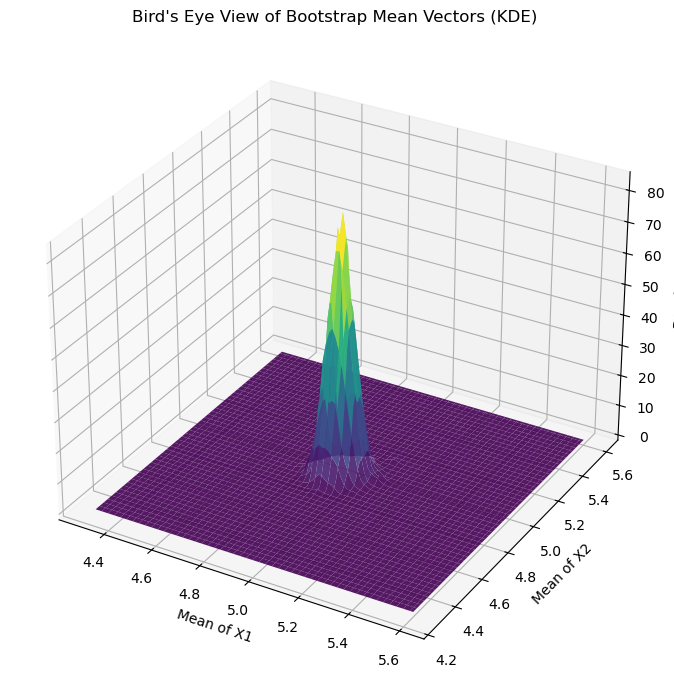

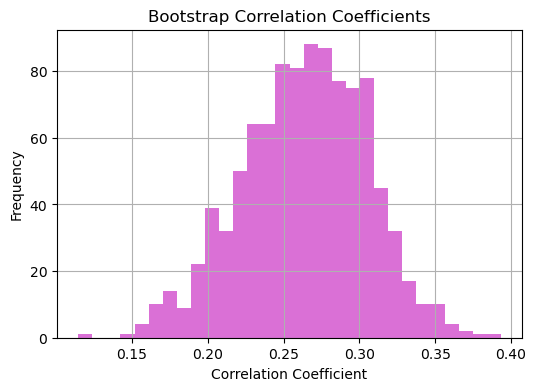

############################################
End
############################################


############################################
Random Seed: 5191
############################################
data.shape (500, 2)


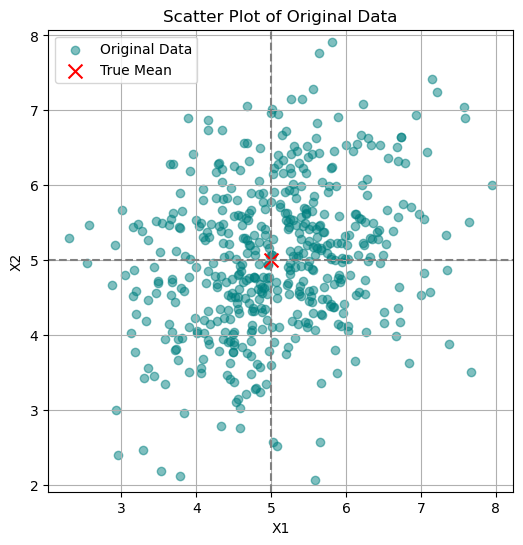

bootstrap_samples.shape (1000, 500, 2)
平均ベクトルの平均: [5.04187107 5.02090979]
共分散行列の平均:
 [[0.9511229  0.25832313]
 [0.25832313 0.96782377]]
相関係数の平均: 0.26904405601740605


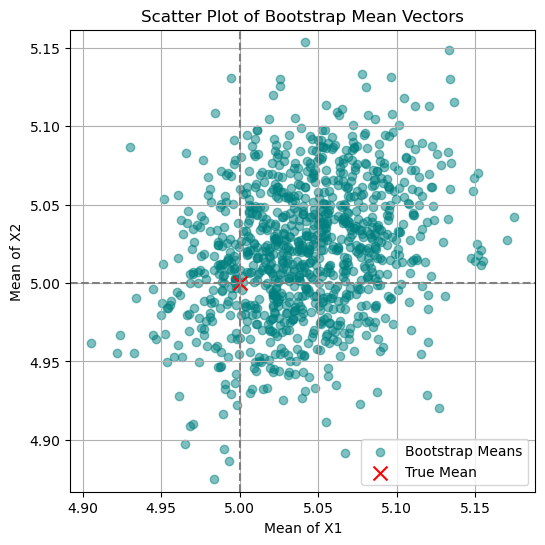

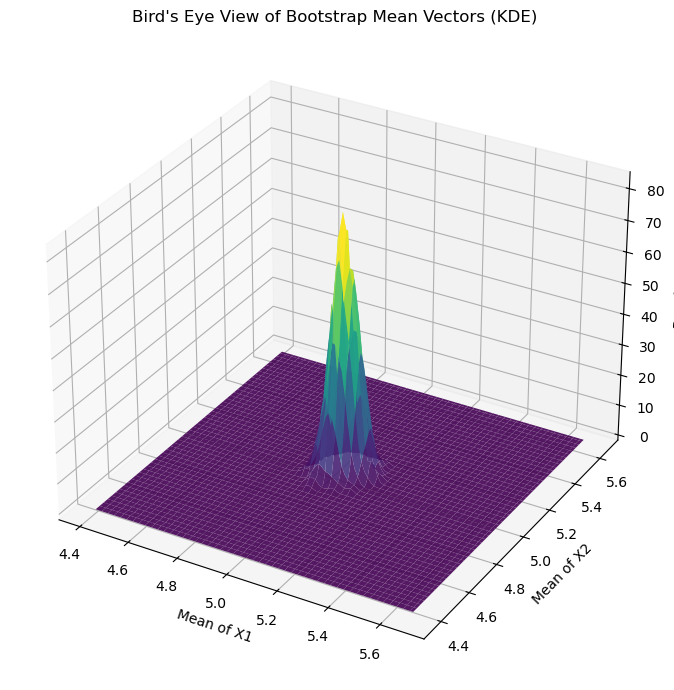

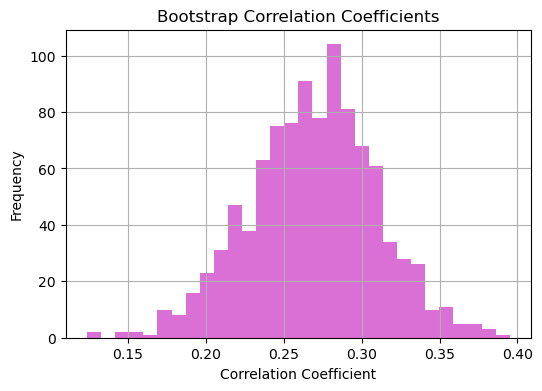

############################################
End
############################################


############################################
Random Seed: 5734
############################################
data.shape (500, 2)


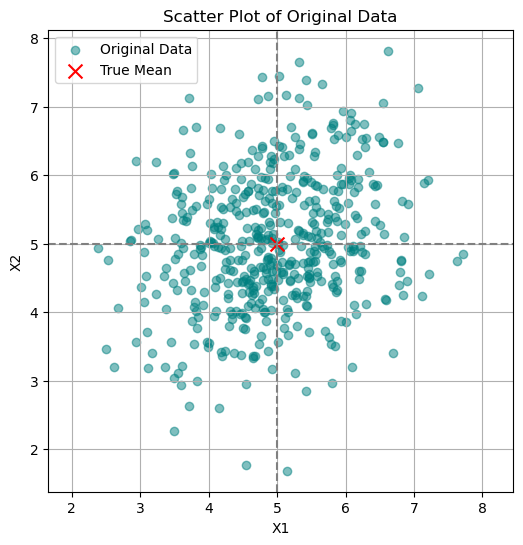

bootstrap_samples.shape (1000, 500, 2)
平均ベクトルの平均: [4.93859803 5.01007028]
共分散行列の平均:
 [[0.91167148 0.22831103]
 [0.22831103 0.97824526]]
相関係数の平均: 0.24163449970358739


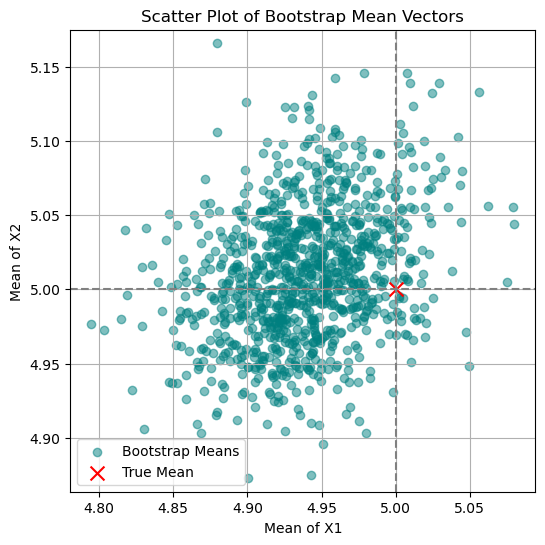

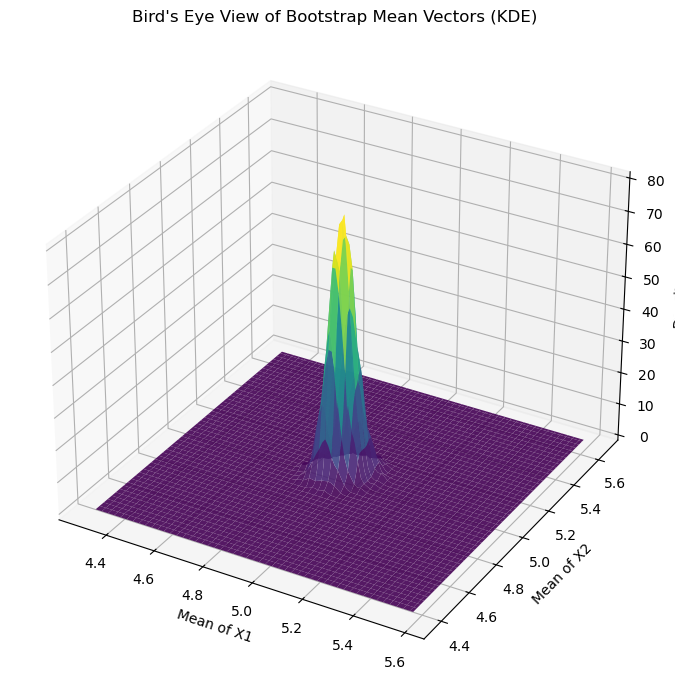

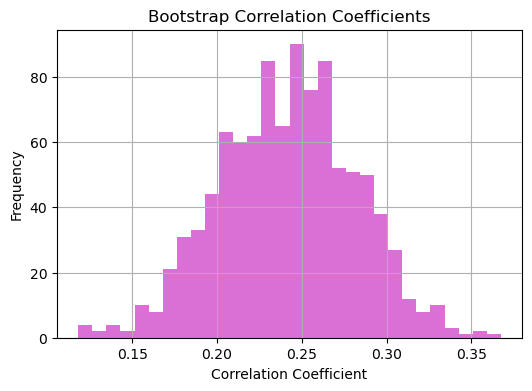

############################################
End
############################################




In [3]:
num_dataset = 1000 # サンプリング回数
dataset_size = 500 # 元データのサイズ 
    
for seed in np.nditer(random_seed):
    print("############################################")
    print("Random Seed:", seed) # 開始の合図
    print("############################################")
    np.random.seed(seed) # 取得した乱数を新しいシード値として設定
    data = np.random.multivariate_normal(original_mean, original_cov, size=dataset_size) # 学習元データの生成 (dataset_size, 2)
    print("data.shape", data.shape) # (dataset_size, 2)

    # 学習元データを可視化する
    plt.figure(figsize=(6, 6))
    plt.scatter(data[:, 0], data[:, 1], alpha=0.5, color='teal', label='Original Data')
    plt.axhline(original_mean[0], color='gray', linestyle='--')
    plt.axvline(original_mean[1], color='gray', linestyle='--')
    plt.scatter(original_mean[0], original_mean[1], color='red', marker='x', s=100, label='True Mean')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Scatter Plot of Original Data')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()



    # ブートストラップ処理
    bootstrap_samples = bootstrap(data, num_dataset) # ブートストラップサンプリングの実行, n_samples個のデータセットを作成
    print("bootstrap_samples.shape", bootstrap_samples.shape) # (1000, 50, 2)
    # ---------------------統計量制御---------------------
    bootstrap_mean_vecs = np.mean(bootstrap_samples, axis=1) # 各ブートストラップサンプルの平均ベクトル（1000, 2）
    bootstrap_cov_mats = np.array([np.cov(sample.T) for sample in bootstrap_samples]) # 各ブートストラップサンプルの共分散行列（1000, 2, 2）
    bootstrap_corr_coefs = np.array([np.corrcoef(sample.T)[0, 1] for sample in bootstrap_samples]) # 各ブートストラップサンプルの相関係数（1000,）

    # サイズの確認
    # print("Bootstrap Mean Vector", bootstrap_mean_vecs.shape) # 平均ベクトル
    # print("Bootstrap Covariance Matrix", bootstrap_cov_mats.shape) # 共分散行列
    # print("Bootstrap Correlation Coefficient", bootstrap_corr_coefs.shape) # 相関係数

    # 代表値を出力
    print("平均ベクトルの平均:", np.mean(bootstrap_mean_vecs, axis=0))
    print("共分散行列の平均:\n", np.mean(bootstrap_cov_mats, axis=0))
    print("相関係数の平均:", np.mean(bootstrap_corr_coefs))





    # 平均ベクトルの分布
    
    plt.figure(figsize=(6, 6))
    plt.scatter(bootstrap_mean_vecs[:, 0], bootstrap_mean_vecs[:, 1], alpha=0.5, color='teal', label='Bootstrap Means')

    # 原点を基準として赤十字
    plt.axhline(original_mean[0], color='gray', linestyle='--')
    plt.axvline(original_mean[1], color='gray', linestyle='--')
    plt.scatter(original_mean[0], original_mean[1], color='red', marker='x', s=100, label='True Mean')

    plt.xlabel('Mean of X1')
    plt.ylabel('Mean of X2')
    plt.title('Scatter Plot of Bootstrap Mean Vectors')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()



    from scipy.stats import gaussian_kde
    from mpl_toolkits.mplot3d import Axes3D  # 必要

    # カーネル密度推定
    kde = gaussian_kde(bootstrap_mean_vecs.T)

    # グリッド生成
    x = np.linspace(np.min(bootstrap_mean_vecs[:, 0]) - 0.5, np.max(bootstrap_mean_vecs[:, 0]) + 0.5, 100)
    y = np.linspace(np.min(bootstrap_mean_vecs[:, 1]) - 0.5, np.max(bootstrap_mean_vecs[:, 1]) + 0.5, 100)
    X, Y = np.meshgrid(x, y)
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = kde(positions).reshape(X.shape)

    # 3Dプロット
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)

    ax.set_xlabel('Mean of X1')
    ax.set_ylabel('Mean of X2')
    ax.set_zlabel('Density')
    ax.set_title('Bird\'s Eye View of Bootstrap Mean Vectors (KDE)')
    plt.tight_layout()
    plt.show()




    # 相関係数の分布
    plt.figure(figsize=(6, 4))
    plt.hist(bootstrap_corr_coefs, bins=30, color='orchid')
    plt.title('Bootstrap Correlation Coefficients')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()




    # 終了の合図
    print("############################################")
    print("End")
    print("############################################")

    # 改行
    print("\n")